In [1]:
File_Name = 'PreProcessing - CosmoHT'
File_Dataset = "Dataset_CMCCPP_Sand8_or.xlsx"
File_Surfactant = 'Surfactant.xlsx'
File_Solid  = 'Solid.xlsx'
attr = ''

seed = 24

In [2]:
# Python â‰¥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn â‰¥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow â‰¥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"


# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(seed)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
#Name Selection
Desc_Config = ['Xeq(mg/L)', 'Temperature_(C)', 'pH_Alkalinity', 'Salinity_Monovalent(%wt)' ]
Desc_Target = ['Sum of Yads(mg/g)']
Desc_Solid =  ['PZC','Size(micro_meter)', 'Area(m^2/g)']

#Load dataset
df = pd.read_excel(File_Dataset)

# Select df range
Dataset_General_CMCCPP = Desc_Config + ['PZC','Area(m^2/g)' ] + ['Transitional', 'Degree_of_Branching', 'Surf_Length' ] + ['R','Critical Micelle Concentration (M)'] + Desc_Target
Dataset_COSMO_CMCCPP = Desc_Config + ['PZC','Area(m^2/g)' ] + ['NHB-HB_Donor'] + ['Head_NHB-Hydrophobicity', 'Head_NHB-HB_Acceptor', 'Head_OT-HB_Acceptor'] + ['Tail_NHB-Hydrophobicity'] + ['R', 'Critical Micelle Concentration (M)'] + Desc_Target
Dataset_COSMO_CMCCPP_LV = Desc_Config + ['PZC','Area(m^2/g)' ] + ['NHB-HB_Donor'] + ['Head_NHB-Hydrophobicity', 'Head_NHB-HB_Acceptor', 'Head_OT-HB_Acceptor'] + ['Tail_NHB-Hydrophobicity'] + ['MolVol','Length (Avogadro, A)','Critical Micelle Concentration (M)']+ Desc_Target
Dataset_COSMO = Desc_Config + ['PZC','Area(m^2/g)' ] + ['NHB-HB_Donor'] + ['Head_NHB-Hydrophobicity', 'Head_NHB-HB_Acceptor', 'Head_OT-HB_Acceptor'] + ['Tail_NHB-Hydrophobicity'] + Desc_Target
Dataset_COSMO_LV = Desc_Config + ['PZC','Area(m^2/g)' ] + ['NHB-HB_Donor'] + ['Head_NHB-Hydrophobicity', 'Head_NHB-HB_Acceptor', 'Head_OT-HB_Acceptor'] + ['Tail_NHB-Hydrophobicity'] + ['MolVol','Length (Avogadro, A)']+ Desc_Target

df = df[Dataset_COSMO_LV]
Descriptor_NonX = list(df.columns.values)
Descriptor_NonX.remove('Sum of Yads(mg/g)')
Descriptor_NonX.remove('Xeq(mg/L)' )

In [4]:


Desc_Config = ['Xeq(mg/L)', 'Temperature_(C)', 'pH_Alkalinity', 'Salinity_Monovalent(%wt)' ]
Desc_Target = ['Sum of Yads(mg/g)']
Desc_Solid =  ['PZC','Size(micro_meter)', 'Area(m^2/g)' ]

Desc_Surfactant_General = ['Surf_Length','Alkyl_Chain_Length', 'Degree_of_Branching', 'EO', 'PO', 'Benzene_Ring', 'MW'  ]
Desc_Surfactant_Partial_Charge = ['Head', 'Extended/Neck', 'Transitional', 'Tail']

Desc_Surfactant_Sigma_Other = ['Cavity_Surface_(A**2)', 'Cavity_Volume_(A**3)', 'No_Segment', 'Total_Solvated_Energy_Corr_(a.u)', 'Outlying_Charge_Effect_(a.u)', 'Dielectric_Energy_Corr_(a.u)', 'Sum_of_Polarization_Charge']
Desc_Surfactant_Sigma_Profile = ['NHB-HB_Donor', 'NHB-Hydrophobicity', 'NHB-HB_Acceptor', 'OH-HB_Donor', 'OH_Hydrophobicity', 'OH-HB_Acceptor', 'OT-HB_Donor', 'OT-Hydrophobicity', 'OT-HB_Acceptor']

Desc_Surfactant_Sigma_Other_Head = ['Head_Cavity_Surface_(A**2)', 'Head_Cavity_Volume_(A**3)', 'Head_No_Segment', 'Head_Total_Solvated_Energy_Corr_(a.u)', 'Head_Outlying_Charge_Effect_(a.u)', 'Head_Dielectric_Energy_Corr_(a.u)', 'Head_Sum_of_Polarization_Charge']
Desc_Surfactant_Sigma_Profile_Head = ['Head_NHB-HB_Donor', 'Head_NHB-Hydrophobicity', 'Head_NHB-HB_Acceptor', 'Head_OH-HB_Donor', 'Head_OH_Hydrophobicity', 'Head_OH-HB_Acceptor', 'Head_OT-HB_Donor', 'Head_OT-Hydrophobicity', 'Head_OT-HB_Acceptor']


Desc_Surfactant_Sigma_Other_Tail = ['Tail_Cavity_Surface_(A**2)', 'Tail_Cavity_Volume_(A**3)', 'Tail_No_Segment', 'Tail_Total_Solvated_Energy_Corr_(a.u)', 'Tail_Outlying_Charge_Effect_(a.u)', 'Tail_Dielectric_Energy_Corr_(a.u)', 'Tail_Sum_of_Polarization_Charge']
Desc_Surfactant_Sigma_Profile_Tail = ['Tail_NHB-Hydrophobicity']



In [5]:
#Load dataset
df = pd.read_excel(File_Dataset)

# Select Dataset 
General_Descriptors = Desc_Config + Desc_Solid + Desc_Surfactant_General + Desc_Target
Partial_Charge_Descriptors = Desc_Config + Desc_Solid + Desc_Surfactant_Partial_Charge + ['MW'] + Desc_Target
Cosmo_Total_Descriptors = Desc_Config + Desc_Solid + Desc_Surfactant_Sigma_Profile + ['MW'] + ['Cavity_Surface_(A**2)'] + Desc_Target
Cosmo_Total_Head_Tail_Descriptors = Desc_Config + Desc_Solid + Desc_Surfactant_Sigma_Profile + Desc_Surfactant_Sigma_Profile_Head + Desc_Surfactant_Sigma_Profile_Tail + ['MW'] + ['Cavity_Surface_(A**2)'] + Desc_Target
Cosmo_Head_Tail_Descriptors = Desc_Config + Desc_Solid + Desc_Surfactant_Sigma_Profile_Head + Desc_Surfactant_Sigma_Profile_Tail + ['MW'] + ['Cavity_Surface_(A**2)'] + Desc_Target
All_Descriptors = Desc_Config + Desc_Solid + Desc_Surfactant_Partial_Charge + Desc_Surfactant_General + Desc_Surfactant_Sigma_Profile + Desc_Surfactant_Sigma_Profile_Head + Desc_Surfactant_Sigma_Profile_Tail + ['Cavity_Surface_(A**2)']+ Desc_Target

df = df[Cosmo_Total_Head_Tail_Descriptors]


In [6]:
#Identify Duplicate Row
# delete rows of duplicate data from the dataset 
from pandas import read_csv 
# load the dataset 
print(df.shape) 
# delete duplicate rows 
df.drop_duplicates(inplace=True) 
print(df.shape)

(551, 29)
(551, 29)


In [7]:
#Delete column with a single unique value
print(df.shape)
unique = (df.nunique())
counts = df.nunique()

column_headers = list(df.columns.values)
column_headers_array = np.array(column_headers)

to_del = [i for i,v in enumerate(counts) if v == 1]
to_del_df = pd.DataFrame({ 'ID_Desc' : to_del, 'Descriptors' : column_headers_array[to_del].tolist()})

df = df.drop(df.columns[to_del], axis=1)
print(df.shape)

to_del_df


(551, 29)
(551, 27)


,ID_Desc,Descriptors
0,13,OT-HB_Donor
1,22,Head_OT-HB_Donor


In [8]:
# summarize the percentage of unique values for each column using numpy 
from numpy import unique 
# summarize the number of unique values in each column 
# convert to array as the call (unique) can only take array as input
arr = df.to_numpy()

#take column headers value
column_headers = list(df.columns.values)
to_drop =  pd.DataFrame()
columns_to_drop = ['ID_Desc', 'Variation', 'Percentage', 'Descriptors']

for i in range(arr.shape[1]):
    num = len(unique(arr[:, i])) 
    percentage = float(num) / arr.shape[0] * 100
    desc = column_headers[i] 
    values = [i, num, percentage, desc]
    drop_dictionary = dict(zip(columns_to_drop, values))

    if percentage < 100: 
        to_drop = to_drop.append(drop_dictionary, ignore_index=True)

to_drop
# Higher value show more unique value for row in each column


,ID_Desc,Variation,Percentage,Descriptors
0,0.0,540.0,98.003630,Xeq(mg/L)
1,1.0,10.0,1.814882,Temperature_(C)
2,2.0,7.0,1.270417,pH_Alkalinity
3,3.0,9.0,1.633394,Salinity_Monovalent(%wt)
4,4.0,5.0,0.907441,PZC
5,5.0,5.0,0.907441,Size(micro_meter)
6,6.0,7.0,1.270417,Area(m^2/g)
7,7.0,14.0,2.540835,NHB-HB_Donor
8,8.0,17.0,3.085299,NHB-Hydrophobicity
9,9.0,17.0,3.085299,NHB-HB_Acceptor


In [9]:
'''
#DropColumn with small variance based on value above ??

# summarize the percentage of unique values for each column using numpy 
from numpy import unique 
# summarize the number of unique values in each column 
# convert to array as the call (unique) can only take array as input
arr = df.to_numpy()

#take column headers value
column_headers = list(df.columns.values)
to_drop =  pd.DataFrame()
columns_to_drop = ['ID_Desc', 'Variation', 'Percentage', 'Descriptors']

for i in range(arr.shape[1]):
    num = len(unique(arr[:, i])) 
    percentage = float(num) / arr.shape[0] * 100
    desc = column_headers[i] 
    values = [i, num, percentage, desc]
    drop_dictionary = dict(zip(columns_to_drop, values))

    if percentage < 100: 
        to_drop = to_drop.append(drop_dictionary, ignore_index=True)

to_drop
# Higher value show more unique value for row in each column

descriptors_to_drop = to_drop['Descriptors'].tolist()
print(df.shape)
df = df.drop(descriptors_to_drop, axis=1) 
print(df.shape)
'''

"\n#DropColumn with small variance based on value above ??\n\n# summarize the percentage of unique values for each column using numpy \nfrom numpy import unique \n# summarize the number of unique values in each column \n# convert to array as the call (unique) can only take array as input\narr = df.to_numpy()\n\n#take column headers value\ncolumn_headers = list(df.columns.values)\nto_drop =  pd.DataFrame()\ncolumns_to_drop = ['ID_Desc', 'Variation', 'Percentage', 'Descriptors']\n\nfor i in range(arr.shape[1]):\n    num = len(unique(arr[:, i])) \n    percentage = float(num) / arr.shape[0] * 100\n    desc = column_headers[i] \n    values = [i, num, percentage, desc]\n    drop_dictionary = dict(zip(columns_to_drop, values))\n\n    if percentage < 100: \n        to_drop = to_drop.append(drop_dictionary, ignore_index=True)\n\nto_drop\n# Higher value show more unique value for row in each column\n\ndescriptors_to_drop = to_drop['Descriptors'].tolist()\nprint(df.shape)\ndf = df.drop(descriptor

 Accuracy Raw Data: -0.391 (0.091)
 Accuracy Normalized Data: -0.295 (0.077)
 Accuracy Standarized Data: -0.304 (0.086)


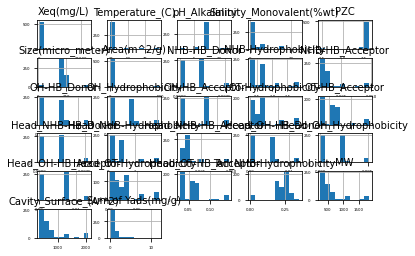

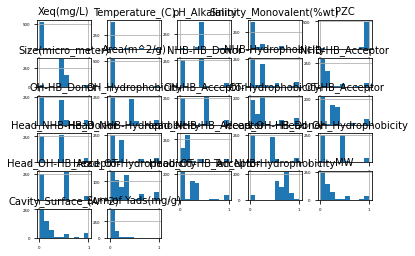

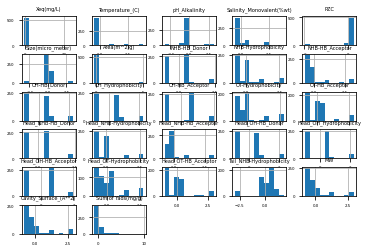

In [10]:
#Normalize and Standarize Data

#Normalization: scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision
#Standarization: scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

#In this case we only normalized the data as the distribution is not gaussian (log based) for X and Y, we didnt change the fingerprint of data, only scale

# evaluate knn on the diabetes dataset with minmax scaler transform 
from numpy import mean 
from numpy import std 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedKFold 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from matplotlib import pyplot
from pandas import DataFrame
import seaborn as sns

# define dataset
dataset_pre_processing = df.to_numpy()
X = dataset_pre_processing[:, :-1]
y = dataset_pre_processing[:, -1] 

# >>> without normalization
model = KNeighborsRegressor() 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error' , cv=cv, n_jobs=-1) 

# report pipeline performance 
print(' Accuracy Raw Data: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#with min max scaler
trans = MinMaxScaler()
model = KNeighborsRegressor() 
pipeline = Pipeline(steps=[(' t' , trans), (' m' , model)]) 

# evaluate the pipeline 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error' , cv=cv, n_jobs=-1) 

# report pipeline performance 
print(' Accuracy Normalized Data: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# >>> with standard scaler
trans = StandardScaler()
model = KNeighborsRegressor() 
pipeline = Pipeline(steps=[(' t' , trans), (' m' , model)]) 

# evaluate the pipeline 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error' , cv=cv, n_jobs=-1) 

# report pipeline performance 
print(' Accuracy Standarized Data: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# histograms of the raw variables 
fig = df.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(10) for x in fig.ravel()] 
pyplot.show()

# histograms of the normalized variables 
trans = MinMaxScaler()
data_plot = trans.fit_transform(df)
column_headers = list(df.columns.values)
df_scaled = DataFrame(data_plot, columns=column_headers)   
fig = df_scaled.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(10) for x in fig.ravel()] 
pyplot.show()

# histograms of the Standarized variables >> Center of data distribution moved around zero
trans = StandardScaler()
data_plot = trans.fit_transform(df)
column_headers = list(df.columns.values)
df_standarized = DataFrame(data_plot, columns=column_headers)
fig = df_standarized.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(5) for x in fig.ravel()] 
pyplot.show()


Saving figure sns heatmap


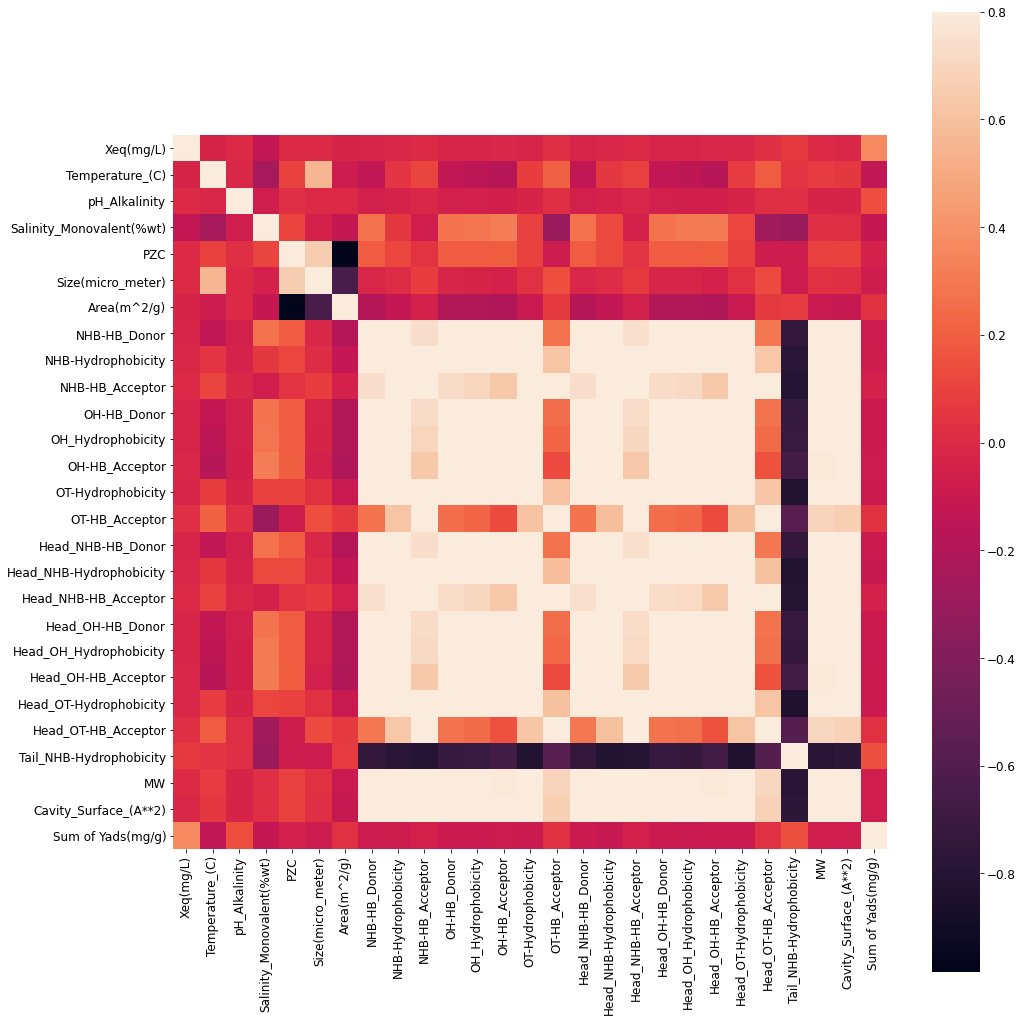

' Skip too large to run\nsns.pairplot(df_scaled, diag_kind=\'kde\')\nsave_fig("sns scatermat")\nplt.show()\n'

In [11]:
#Correlation matices
corr_matrix = df_scaled.corr()
corr_matrix['Sum of Yads(mg/g)'].sort_values(ascending=False)
fig = plt.figure(figsize = (15,15))


import seaborn as sns
sns.heatmap(corr_matrix, vmax = .8, square = True)
save_fig("sns heatmap")
plt.show()

''' Skip too large to run
sns.pairplot(df_scaled, diag_kind='kde')
save_fig("sns scatermat")
plt.show()
'''

 > lr -0.516 (0.108) 0.209
 > sgd -0.280 (0.117) 0.416
 > cart -0.188 (0.063) 0.333
 > rf -0.192 (0.078) 0.408
 > gbm -0.193 (0.082) 0.423


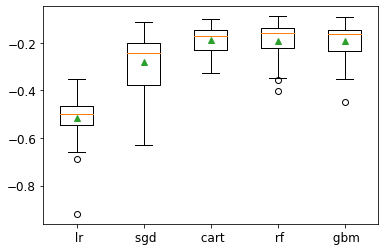

In [12]:
#Various Base Alogarithm
# explore the algorithm wrapped by RFE 
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from matplotlib import pyplot


# get a list of models to evaluate 
def get_models():
    models = dict()
    # lr 
    trans = StandardScaler()
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=5) # to choose features
    model = DecisionTreeRegressor()  # to evaluate selected feature
    models[' lr' ] = Pipeline(steps=[(' t', trans), (' s' ,rfe),(' m' ,model)])
    
    # perceptron 
    trans = StandardScaler()
    rfe = RFE(estimator=SGDRegressor(), n_features_to_select=5) 
    model = DecisionTreeRegressor() 
    models[' sgd' ] = Pipeline(steps=[(' t', trans), (' s' ,rfe),(' m' ,model)]) 
    
    # cart 
    trans = StandardScaler()
    rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5) 
    model = DecisionTreeRegressor()
    models[' cart' ] = Pipeline(steps=[(' t', trans), (' s' ,rfe),(' m' ,model)]) 
    
    # rf
    trans = StandardScaler()
    rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=5) 
    model = DecisionTreeRegressor() 
    models[' rf' ] = Pipeline(steps=[(' t', trans), (' s' ,rfe),(' m' ,model)]) 
    
    # gbm 
    trans = StandardScaler()
    rfe = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=5) 
    model = DecisionTreeRegressor() 
    models[' gbm' ] = Pipeline(steps=[(' t', trans), (' s' ,rfe),(' m' ,model)]) 
    return models

# evaluate a given model using cross-validation 
def evaluate_model(model, X, y): 
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error' , cv=cv, n_jobs=-1) 
    return scores

# define dataset
data = df.to_numpy()
X = data[:, :-1]
y = data[:, -1] 

# get the models to evaluate 
models = get_models() 
# evaluate the models and store results 
results, names = list(), list() 
for name, model in models.items(): 
    scores = evaluate_model(model, X, y) 
    results.append(scores) 
    names.append(name) 
    print(' >%s %.3f (%.3f) %.3f' % (name, mean(scores), std(scores), abs(std(scores)/mean(scores))))
# plot model performance for comparison 
pyplot.boxplot(results, labels=names, showmeans=True) 
pyplot.show()

>1 -0.660 (0.134) 0.202
>2 -0.468 (0.114) 0.243
>3 -0.264 (0.092) 0.347
>4 -0.200 (0.073) 0.366
>5 -0.193 (0.067) 0.346
>6 -0.178 (0.074) 0.413
>7 -0.171 (0.064) 0.374
>8 -0.156 (0.055) 0.354
>9 -0.150 (0.060) 0.400
>10 -0.145 (0.062) 0.426
>11 -0.146 (0.064) 0.439
>12 -0.143 (0.058) 0.410
>13 -0.145 (0.071) 0.492
>14 -0.142 (0.058) 0.407
>15 -0.140 (0.060) 0.426
>16 -0.145 (0.061) 0.423
>17 -0.143 (0.062) 0.433
>18 -0.143 (0.061) 0.429
>19 -0.142 (0.062) 0.436
>20 -0.141 (0.057) 0.407
>21 -0.147 (0.068) 0.461
>22 -0.144 (0.072) 0.500
>23 -0.138 (0.056) 0.409
>24 -0.140 (0.059) 0.418
>25 -0.141 (0.060) 0.426
>26 -0.144 (0.065) 0.452


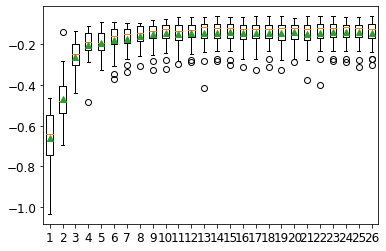

In [13]:
# explore the number of selected features for RFE 
# >> Decision tree is choosen based on previous performance

from numpy import mean 
from numpy import std 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedKFold 
from sklearn.feature_selection import RFE 
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from matplotlib import pyplot

# define dataset
data = df.to_numpy()
size = df.shape[1]
X = data[:, :-1]
y = data[:, -1] 


# get a list of models to evaluate 
def get_models(): 
    models = dict() 
    for i in range(1, size):
     trans = StandardScaler()
     rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i) 
     model = DecisionTreeRegressor() 
     models[str(i)] = Pipeline(steps=[(' t', trans), ('s' ,rfe),('m' ,model)])
    return models

# evaluate a given model using cross-validation 
def evaluate_model(model, X, y): 
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error' , cv=cv, n_jobs=-1) 
    return scores


# get the models to evaluate 
models = get_models()

# evaluate the models and store results 
results, names = list(), list() 
for name, model in models.items(): 
    scores = evaluate_model(model, X, y) 
    results.append(scores) 
    names.append(name) 
    print('>%s %.3f (%.3f) %.3f' % (name, mean(scores), std(scores), abs(std(scores)/mean(scores))))

# plot model performance for comparison 
pyplot.boxplot(results, labels=names, showmeans=True) 
pyplot.show()

In [14]:
#Which feature being selected
#Automatic Feature Selection with CrossValidation (CV) - RFECV 
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


data = df.to_numpy()

# define dataset
X = data[:, :-1]  
y = data[:, -1] 


# create pipeline
trans = StandardScaler()
rfe = RFECV(estimator=DecisionTreeRegressor())
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[(' t', trans), ('s' ,rfe),('m' ,model)])

# evaluate model
cv = RepeatedKFold(n_splits=20, n_repeats=5, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print('MAE: %.3f (%.3f) %.3f' % (mean(n_scores), std(n_scores), abs(std(n_scores)/mean(n_scores))))

column_headers = list(df.columns.values)
column_header_rfe = ['ID_Desc', 'Selected', 'Rank', 'Descriptors']
rfe_table =  pd.DataFrame()

# fit RFE 
rfe.fit(X, y) 
X.shape[1]

# summarize all features 
for i in range(X.shape[1]): 
    Desc = column_headers[i]
    value_rfe = (i, str(bool(rfe.support_[i])), rfe.ranking_[i], Desc)
    rfe_dictionary = dict(zip(column_header_rfe, value_rfe))
    rfe_table = rfe_table.append(rfe_dictionary, ignore_index=True)

rfe_table
# Higher value show more unique value for row in each column

MAE: -0.152 (0.122) 0.803


,ID_Desc,Selected,Rank,Descriptors
0,0.0,True,1.0,Xeq(mg/L)
1,1.0,True,1.0,Temperature_(C)
2,2.0,True,1.0,pH_Alkalinity
3,3.0,True,1.0,Salinity_Monovalent(%wt)
4,4.0,False,8.0,PZC
5,5.0,True,1.0,Size(micro_meter)
6,6.0,True,1.0,Area(m^2/g)
7,7.0,False,12.0,NHB-HB_Donor
8,8.0,True,1.0,NHB-Hydrophobicity
9,9.0,False,5.0,NHB-HB_Acceptor
